In [1]:
%run CommonCodeForExperiments.ipynb

In [3]:
aitia = App()

In [4]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.FCI)
algorithm_list.append(aitia.algo_runner.FGES_continuous)
algorithm_list.append(aitia.algo_runner.GFCI_continuous)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [5]:
def run_causal_discovery(df, target_graph_str, algorithm_list, pc):
    analysis_results, summary = aitia.run_analysis(df, 
                                               target_graph_str=target_graph_str, 
                                               algorithm_list=algorithm_list,
                                               pc=pc)  
    return analysis_results, summary 

In [30]:
def get_clustered_dataframe(incoming_df, column_list, sample_size):
    gmm = mixture.BayesianGaussianMixture(n_components=2, 
                                          covariance_type="full", 
                                          n_init=100, 
                                          random_state=42).fit(incoming_df)
    clustered_data = gmm.sample(sample_size)
    clustered_df = pd.DataFrame(clustered_data[0], columns=column_list)
    return clustered_df

In [7]:
pc = pycausal()
pc.start_vm()

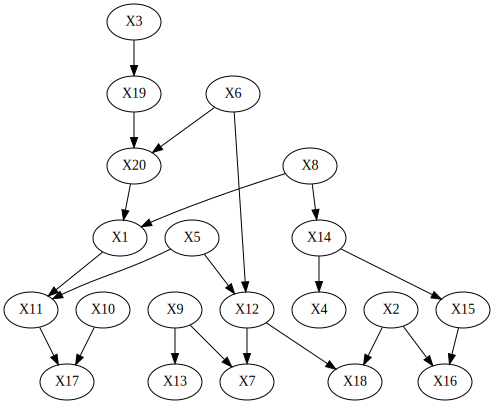

In [31]:
random_scm1 = aitia.data.random_scm1()
random_scm1.cgm.draw()

In [33]:
target_graph_str = str(random_scm1.cgm.draw())

In [34]:
df = random_scm1.sample(2000)

In [35]:
analysis_results, summary = run_causal_discovery(df, target_graph_str, algorithm_list, pc)
summary

,Algorithm,AUPR,SHD
0,PC,0.368377,26
1,FCI,0.368377,26
2,FGES-continuous,0.359167,27
3,GFCI-continuous,0.368377,26
4,RFCI-continuous,0.368377,26


In [36]:
df_confd = df.drop(['X12', 'X5', 'X14', 'X2', 'X15'], axis=1)

In [37]:
analysis_results_confd, summary_confd = run_causal_discovery(df_confd, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.259345,27
1,FCI,0.259345,27
2,FGES-continuous,0.249821,28
3,GFCI-continuous,0.259345,27
4,RFCI-continuous,0.259345,27


In [38]:
column_list = list(df_confd)
clustered_df = get_clustered_dataframe(df_confd, column_list, 2000)
_, summary_confd = run_causal_discovery(clustered_df, target_graph_str, algorithm_list, pc)
summary_confd

,Algorithm,AUPR,SHD
0,PC,0.259345,27
1,FCI,0.259345,27
2,FGES-continuous,0.249821,28
3,GFCI-continuous,0.259345,27
4,RFCI-continuous,0.259345,27
